# Generic_tech

gdsfactory includes a generic Technology module in `gdsfactory.generic_tech` that you can use as an inspiration to create your own.

## Layers

Each foundry uses different GDS layer numbers for different process steps.

We follow the generic layer numbers from the book "Silicon Photonics Design: From Devices to Systems Lukas Chrostowski, Michael Hochberg".

| GDS (layer, purpose) | layer_name | Description                                                 |
| -------------------- | ---------- | ----------------------------------------------------------- |
| 1 , 0                | WG         | 220 nm Silicon core                                         |
| 2 , 0                | SLAB150    | 150nm Silicon slab (70nm shallow Etch for grating couplers) |
| 3 , 0                | SLAB90     | 90nm Silicon slab (for modulators)                          |
| 4, 0                 | DEEPTRENCH | Deep trench                                                 |
| 47, 0                | MH         | heater                                                      |
| 41, 0                | M1         | metal 1                                                     |
| 45, 0                | M2         | metal 2                                                     |
| 40, 0                | VIAC       | VIAC to contact Ge, NPP or PPP                              |
| 44, 0                | VIA1       | VIA1                                                        |
| 46, 0                | PADOPEN    | Bond pad opening                                            |
| 51, 0                | UNDERCUT   | Undercut                                                    |
| 66, 0                | TEXT       | Text markup                                                 |
| 64, 0                | FLOORPLAN  | Mask floorplan                                              |

Layers are available in `gf.LAYER` as `gf.LAYER.WG`, `gf.LAYER.WGCLAD`


![layer stack](https://i.imgur.com/GUb1Kav.png)


A GDS has different layers to describe the different fabrication process steps.

GDS layers have 2 integer numbers: GDSlayer, GDSpurpose

Klayout shows Layers with a color, style and transparency when showing GDS layouts.

In [1]:
import gdsfactory as gf
from gdsfactory.generic_tech import LAYER, LAYER_STACK
from gdsfactory.generic_tech.get_klayout_pyxs import get_klayout_pyxs
from gdsfactory.technology import LayerLevel, LayerStack

2023-01-22 16:10:05.538 | INFO     | gdsfactory.config:<module>:50 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 6.23.4


2023-01-22 16:10:06.365 | INFO     | gdsfactory.technology.layer_views:__init__:779 - Importing LayerViews from KLayout layer properties file: /home/runner/work/gdsfactory/gdsfactory/gdsfactory/generic_tech/klayout/tech/layers.lyp.


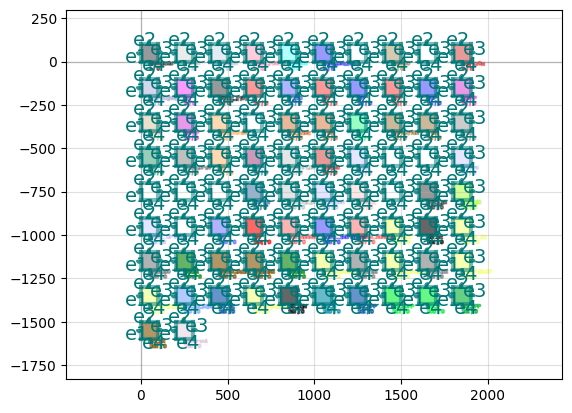

layerset_1a43e0bd: uid 1a43e0bd, ports [], references ['rectangle_1', 'text_1', 'rectangle_2', 'text_2', 'rectangle_3', 'text_3', 'rectangle_4', 'text_4', 'rectangle_5', 'text_5', 'rectangle_6', 'text_6', 'rectangle_7', 'text_7', 'rectangle_8', 'text_8', 'rectangle_9', 'text_9', 'rectangle_10', 'text_10', 'rectangle_11', 'text_11', 'rectangle_12', 'text_12', 'rectangle_13', 'text_13', 'rectangle_14', 'text_14', 'rectangle_15', 'text_15', 'rectangle_16', 'text_16', 'rectangle_17', 'text_17', 'rectangle_18', 'text_18', 'rectangle_19', 'text_19', 'rectangle_20', 'text_20', 'rectangle_21', 'text_21', 'rectangle_22', 'text_22', 'rectangle_23', 'text_23', 'rectangle_24', 'text_24', 'rectangle_25', 'text_25', 'rectangle_26', 'text_26', 'rectangle_27', 'text_27', 'rectangle_28', 'text_28', 'rectangle_29', 'text_29', 'rectangle_30', 'text_30', 'rectangle_31', 'text_31', 'rectangle_32', 'text_32', 'rectangle_33', 'text_33', 'rectangle_34', 'text_34', 'rectangle_35', 'text_35', 'rectangle_36', 'text_36', 'rectangle_37', 'text_37', 'rectangle_38', 'text_38', 'rectangle_39', 'text_39', 'rectangle_40', 'text_40', 'rectangle_41', 'text_41', 'rectangle_42', 'text_42', 'rectangle_43', 'text_43', 'rectangle_44', 'text_44', 'rectangle_45', 'text_45', 'rectangle_46', 'text_46', 'rectangle_47', 'text_47', 'rectangle_48', 'text_48', 'rectangle_49', 'text_49', 'rectangle_50', 'text_50', 'rectangle_51', 'text_51', 'rectangle_52', 'text_52', 'rectangle_53', 'text_53', 'rectangle_54', 'text_54', 'rectangle_55', 'text_55', 'rectangle_56', 'text_56', 'rectangle_57', 'text_57', 'rectangle_58', 'text_58', 'rectangle_59', 'text_59', 'rectangle_60', 'text_60', 'rectangle_61', 'text_61', 'rectangle_62', 'text_62', 'rectangle_63', 'text_63', 'rectangle_64', 'text_64', 'rectangle_65', 'text_65', 'rectangle_66', 'text_66', 'rectangle_67', 'text_67', 'rectangle_68', 'text_68', 'rectangle_69', 'text_69', 'rectangle_70', 'text_70', 'rectangle_71', 'text_71', 'rectangle_72', 'text_72', 'rectangle_73', 'text_73', 'rectangle_74', 'text_74', 'rectangle_75', 'text_75', 'rectangle_76', 'text_76', 'rectangle_77', 'text_77', 'rectangle_78', 'text_78', 'rectangle_79', 'text_79', 'rectangle_80', 'text_80', 'rectangle_81', 'text_81', 'rectangle_82', 'text_82'], 0 polygons

In [2]:
c = gf.generic_tech.LAYER_VIEWS.preview_layerset()
c

In [3]:
layer_wg = gf.LAYER.WG
print(layer_wg)

(1, 0)


### Extract layers

You can also extract layers using the `extract` function. This function returns a new flattened Component that contains the extracted layers.
A flat Component does not have references, and all the polygons are absorbed by the top cell.

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1522: UserWarning: Component 'Unnamed_603564b7' contains 1 Unnamed cells
  warnings.warn(


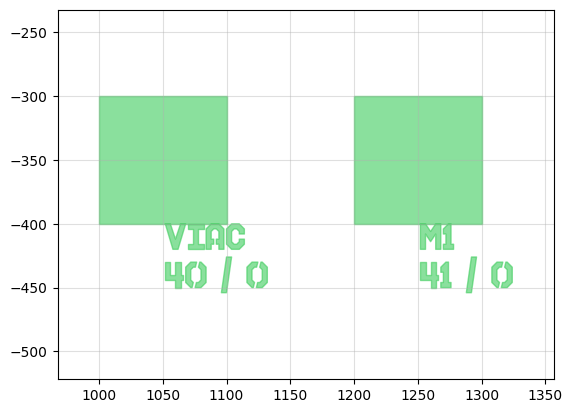

Unnamed_603564b7: uid 603564b7, ports [], references [], 19 polygons

In [4]:
extract = c.extract(layers=(gf.LAYER.M1, gf.LAYER.VIAC))
extract

### Remove layers

You can remove layers using the `remove_layers()` function.

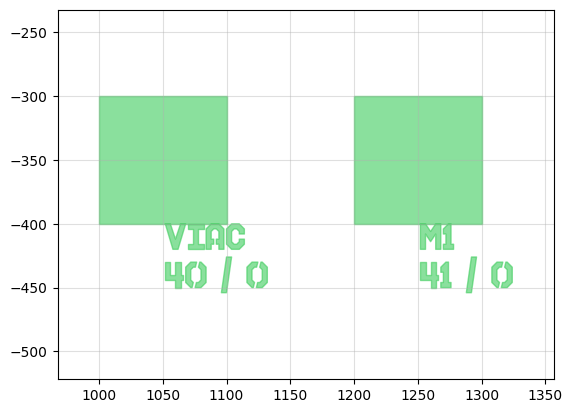

Unnamed_603564b7: uid 603564b7, ports [], references [], 19 polygons

In [5]:
removed = extract.remove_layers(layers=(gf.LAYER.VIAC,))
removed

### Remap layers

You can remap (change the polygons from one layer to another layer) using the `remap_layer`, which will return a new `Component`

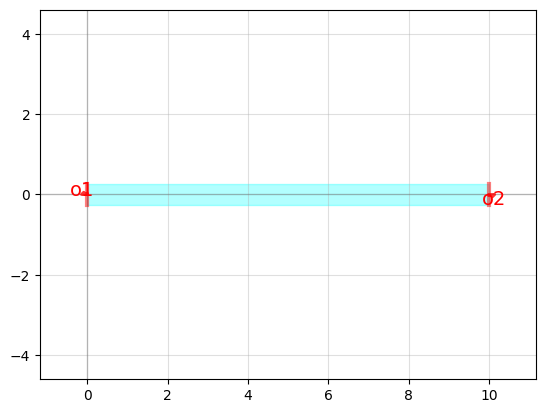

straight_layer2__0: uid 65343a15, ports ['o1', 'o2'], references [], 1 polygons

In [6]:
c = gf.components.straight(layer=(2, 0))
c

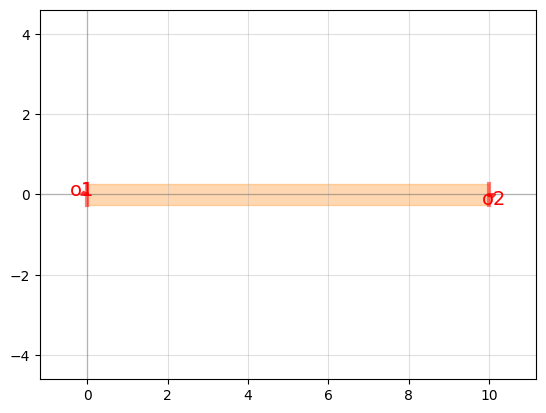

straight_layer2__0: uid 65343a15, ports ['o1', 'o2'], references [], 1 polygons

In [7]:
remap = c.remap_layers(layermap={(2, 0): gf.LAYER.WGN})
remap

## LayerStack

Each layer also includes the information of thickness and position of each layer.

This LayerStack can be used for:

- render a 3D image
- FDTD simulations

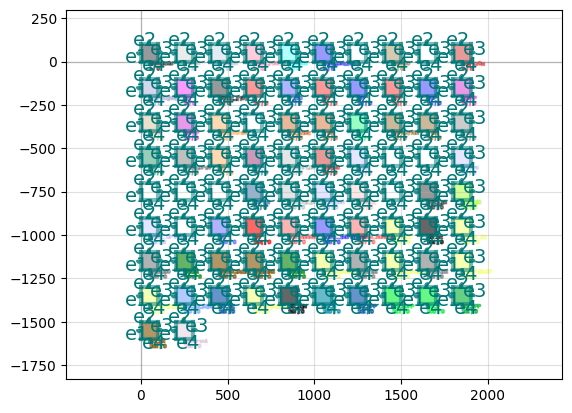

layerset_b1190748: uid b1190748, ports [], references ['rectangle_1', 'text_1', 'rectangle_2', 'text_2', 'rectangle_3', 'text_3', 'rectangle_4', 'text_4', 'rectangle_5', 'text_5', 'rectangle_6', 'text_6', 'rectangle_7', 'text_7', 'rectangle_8', 'text_8', 'rectangle_9', 'text_9', 'rectangle_10', 'text_10', 'rectangle_11', 'text_11', 'rectangle_12', 'text_12', 'rectangle_13', 'text_13', 'rectangle_14', 'text_14', 'rectangle_15', 'text_15', 'rectangle_16', 'text_16', 'rectangle_17', 'text_17', 'rectangle_18', 'text_18', 'rectangle_19', 'text_19', 'rectangle_20', 'text_20', 'rectangle_21', 'text_21', 'rectangle_22', 'text_22', 'rectangle_23', 'text_23', 'rectangle_24', 'text_24', 'rectangle_25', 'text_25', 'rectangle_26', 'text_26', 'rectangle_27', 'text_27', 'rectangle_28', 'text_28', 'rectangle_29', 'text_29', 'rectangle_30', 'text_30', 'rectangle_31', 'text_31', 'rectangle_32', 'text_32', 'rectangle_33', 'text_33', 'rectangle_34', 'text_34', 'rectangle_35', 'text_35', 'rectangle_36', 'text_36', 'rectangle_37', 'text_37', 'rectangle_38', 'text_38', 'rectangle_39', 'text_39', 'rectangle_40', 'text_40', 'rectangle_41', 'text_41', 'rectangle_42', 'text_42', 'rectangle_43', 'text_43', 'rectangle_44', 'text_44', 'rectangle_45', 'text_45', 'rectangle_46', 'text_46', 'rectangle_47', 'text_47', 'rectangle_48', 'text_48', 'rectangle_49', 'text_49', 'rectangle_50', 'text_50', 'rectangle_51', 'text_51', 'rectangle_52', 'text_52', 'rectangle_53', 'text_53', 'rectangle_54', 'text_54', 'rectangle_55', 'text_55', 'rectangle_56', 'text_56', 'rectangle_57', 'text_57', 'rectangle_58', 'text_58', 'rectangle_59', 'text_59', 'rectangle_60', 'text_60', 'rectangle_61', 'text_61', 'rectangle_62', 'text_62', 'rectangle_63', 'text_63', 'rectangle_64', 'text_64', 'rectangle_65', 'text_65', 'rectangle_66', 'text_66', 'rectangle_67', 'text_67', 'rectangle_68', 'text_68', 'rectangle_69', 'text_69', 'rectangle_70', 'text_70', 'rectangle_71', 'text_71', 'rectangle_72', 'text_72', 'rectangle_73', 'text_73', 'rectangle_74', 'text_74', 'rectangle_75', 'text_75', 'rectangle_76', 'text_76', 'rectangle_77', 'text_77', 'rectangle_78', 'text_78', 'rectangle_79', 'text_79', 'rectangle_80', 'text_80', 'rectangle_81', 'text_81', 'rectangle_82', 'text_82'], 0 polygons

In [8]:
c = gf.generic_tech.LAYER_VIEWS.preview_layerset()
c

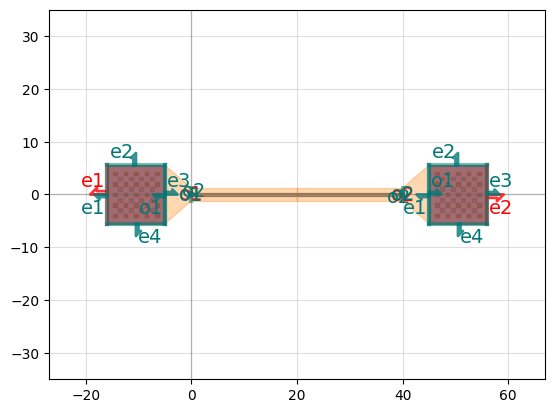

straight_heater_metal_u_d99b3f2a: uid 2068272b, ports ['o1', 'o2', 'e1', 'e2'], references ['component_sequence_1', 'via_stack_1', 'via_stack_2', 'taper_1', 'taper_2'], 0 polygons

In [9]:
nm = 1e-3


def get_layer_stack(
    thickness_wg: float = 220 * nm,
    thickness_slab_deep_etch: float = 90 * nm,
    thickness_clad: float = 3.0,
    thickness_nitride: float = 350 * nm,
    thickness_ge: float = 500 * nm,
    gap_silicon_to_nitride: float = 100 * nm,
    zmin_heater: float = 1.1,
    zmin_metal1: float = 1.1,
    thickness_metal1: float = 700 * nm,
    zmin_metal2: float = 2.3,
    thickness_metal2: float = 700 * nm,
    zmin_metal3: float = 3.2,
    thickness_metal3: float = 2000 * nm,
    substrate_thickness: float = 10.0,
    box_thickness: float = 3.0,
    undercut_thickness: float = 5.0,
) -> LayerStack:
    """Returns generic LayerStack.

    based on paper https://www.degruyter.com/document/doi/10.1515/nanoph-2013-0034/html

    Args:
        thickness_wg: waveguide thickness in um.
        thickness_slab_deep_etch: for deep etched slab.
        thickness_clad: cladding thickness in um.
        thickness_nitride: nitride thickness in um.
        thickness_ge: germanium thickness.
        gap_silicon_to_nitride: distance from silicon to nitride in um.
        zmin_heater: TiN heater.
        zmin_metal1: metal1.
        thickness_metal1: metal1 thickness.
        zmin_metal2: metal2.
        thickness_metal2: metal2 thickness.
        zmin_metal3: metal3.
        thickness_metal3: metal3 thickness.
        substrate_thickness: substrate thickness in um.
        box_thickness: bottom oxide thickness in um.
        undercut_thickness: thickness of the silicon undercut.
    """

    class GenericLayerStack(LayerStack):
        substrate = LayerLevel(
            layer=LAYER.WAFER,
            thickness=substrate_thickness,
            zmin=-substrate_thickness - box_thickness,
            material="si",
            info={"mesh_order": 99},
        )
        box = LayerLevel(
            layer=LAYER.WAFER,
            thickness=box_thickness,
            zmin=-box_thickness,
            material="sio2",
            info={"mesh_order": 99},
        )
        core = LayerLevel(
            layer=LAYER.WG,
            thickness=thickness_wg,
            zmin=0.0,
            material="si",
            info={"mesh_order": 1},
            sidewall_angle=10,
            width_to_z=0.5,
        )
        clad = LayerLevel(
            # layer=LAYER.WGCLAD,
            layer=LAYER.WAFER,
            zmin=0.0,
            material="sio2",
            thickness=thickness_clad,
            info={"mesh_order": 10},
        )
        slab150 = LayerLevel(
            layer=LAYER.SLAB150,
            thickness=150e-3,
            zmin=0,
            material="si",
            info={"mesh_order": 3},
        )
        slab90 = LayerLevel(
            layer=LAYER.SLAB90,
            thickness=thickness_slab_deep_etch,
            zmin=0.0,
            material="si",
            info={"mesh_order": 2},
        )
        nitride = LayerLevel(
            layer=LAYER.WGN,
            thickness=thickness_nitride,
            zmin=thickness_wg + gap_silicon_to_nitride,
            material="sin",
            info={"mesh_order": 2},
        )
        ge = LayerLevel(
            layer=LAYER.GE,
            thickness=thickness_ge,
            zmin=thickness_wg,
            material="ge",
            info={"mesh_order": 1},
        )
        undercut = LayerLevel(
            layer=LAYER.UNDERCUT,
            thickness=-undercut_thickness,
            zmin=-box_thickness,
            material="air",
            z_to_bias=[
                [0, 0.3, 0.6, 0.8, 0.9, 1],
                [-0, -0.5, -1, -1.5, -2, -2.5],
            ],
            info={"mesh_order": 1},
        )
        via_contact = LayerLevel(
            layer=LAYER.VIAC,
            thickness=zmin_metal1 - thickness_slab_deep_etch,
            zmin=thickness_slab_deep_etch,
            material="Aluminum",
            info={"mesh_order": 1},
            sidewall_angle=-10,
            width_to_z=0,
        )
        metal1 = LayerLevel(
            layer=LAYER.M1,
            thickness=thickness_metal1,
            zmin=zmin_metal1,
            material="Aluminum",
            info={"mesh_order": 2},
        )
        heater = LayerLevel(
            layer=LAYER.HEATER,
            thickness=750e-3,
            zmin=zmin_heater,
            material="TiN",
            info={"mesh_order": 1},
        )
        via1 = LayerLevel(
            layer=LAYER.VIA1,
            thickness=zmin_metal2 - (zmin_metal1 + thickness_metal1),
            zmin=zmin_metal1 + thickness_metal1,
            material="Aluminum",
            info={"mesh_order": 2},
        )
        metal2 = LayerLevel(
            layer=LAYER.M2,
            thickness=thickness_metal2,
            zmin=zmin_metal2,
            material="Aluminum",
            info={"mesh_order": 2},
        )
        via2 = LayerLevel(
            layer=LAYER.VIA2,
            thickness=zmin_metal3 - (zmin_metal2 + thickness_metal2),
            zmin=zmin_metal2 + thickness_metal2,
            material="Aluminum",
            info={"mesh_order": 1},
        )
        metal3 = LayerLevel(
            layer=LAYER.M3,
            thickness=thickness_metal3,
            zmin=zmin_metal3,
            material="Aluminum",
            info={"mesh_order": 2},
        )

    return GenericLayerStack()


layer_stack220 = get_layer_stack(thickness_wg=0.220)

c = gf.components.straight_heater_metal(length=40)
c

In [10]:
scene = c.to_3d(layer_stack=layer_stack220)
scene.show()

In [11]:
# lets assume we have 0.900 silicon instead of 0.220um, You will see a much thicker waveguide under the metal heater.
layer_stack9000 = get_layer_stack(thickness_wg=0.9)
scene = c.to_3d(layer_stack=layer_stack9000)
scene.show()

### 3D rendering

To render components in 3D you will need to define two things:

1. LayerStack: for each layer contains thickness of each material and z position
2. LayerViews: for each layer contains view (color, pattern, opacity). You can load it with `gf.technology.LayerView.load_lyp()`

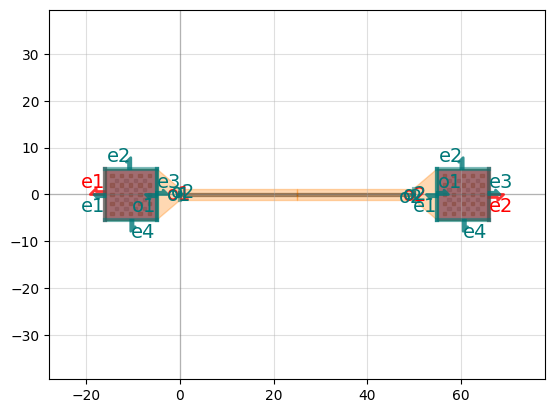

straight_heater_metal_u_d92d12b4: uid 8b381f69, ports ['o1', 'o2', 'e1', 'e2'], references ['component_sequence_1', 'via_stack_1', 'via_stack_2', 'taper_1', 'taper_2'], 0 polygons

In [12]:
heater = gf.components.straight_heater_metal(length=50)
heater

In [13]:
scene = heater.to_3d()
scene.show()

### Klayout 2.5D view

From the `LayerStack` you can generate the KLayout 2.5D view script.

In [14]:
LAYER_STACK.get_klayout_3d_script()

z(input(99999, 0), zstart: -13.0, zstop: -3.0, name: 'substrate: si 99999/0')
z(input(99999, 0), zstart: -3.0, zstop: 0.0, name: 'box: sio2 99999/0')
z(input(1, 0), zstart: 0.0, zstop: 0.22, name: 'core: si 1/0')
z(input(99999, 0), zstart: 0.0, zstop: 3.0, name: 'clad: sio2 99999/0')
z(input(2, 0), zstart: 0.0, zstop: 0.15, name: 'slab150: si 2/0')
z(input(3, 0), zstart: 0.0, zstop: 0.09, name: 'slab90: si 3/0')
z(input(34, 0), zstart: 0.32, zstop: 0.67, name: 'nitride: sin 34/0')
z(input(5, 0), zstart: 0.22, zstop: 0.72, name: 'ge: ge 5/0')
z(input(6, 0), zstart: -3.0, zstop: -8.0, name: 'undercut: air 6/0')
z(input(40, 0), zstart: 0.09, zstop: 1.1, name: 'via_contact: Aluminum 40/0')
z(input(41, 0), zstart: 1.1, zstop: 1.8, name: 'metal1: Aluminum 41/0')
z(input(47, 0), zstart: 1.1, zstop: 1.85, name: 'heater: TiN 47/0')
z(input(44, 0), zstart: 1.8, zstop: 2.3, name: 'via1: Aluminum 44/0')
z(input(45, 0), zstart: 2.3, zstop: 3.0, name: 'metal2: Aluminum 45/0')
z(input(43, 0), zstart:

"z(input(99999, 0), zstart: -13.0, zstop: -3.0, name: 'substrate: si 99999/0')\nz(input(99999, 0), zstart: -3.0, zstop: 0.0, name: 'box: sio2 99999/0')\nz(input(1, 0), zstart: 0.0, zstop: 0.22, name: 'core: si 1/0')\nz(input(99999, 0), zstart: 0.0, zstop: 3.0, name: 'clad: sio2 99999/0')\nz(input(2, 0), zstart: 0.0, zstop: 0.15, name: 'slab150: si 2/0')\nz(input(3, 0), zstart: 0.0, zstop: 0.09, name: 'slab90: si 3/0')\nz(input(34, 0), zstart: 0.32, zstop: 0.67, name: 'nitride: sin 34/0')\nz(input(5, 0), zstart: 0.22, zstop: 0.72, name: 'ge: ge 5/0')\nz(input(6, 0), zstart: -3.0, zstop: -8.0, name: 'undercut: air 6/0')\nz(input(40, 0), zstart: 0.09, zstop: 1.1, name: 'via_contact: Aluminum 40/0')\nz(input(41, 0), zstart: 1.1, zstop: 1.8, name: 'metal1: Aluminum 41/0')\nz(input(47, 0), zstart: 1.1, zstop: 1.85, name: 'heater: TiN 47/0')\nz(input(44, 0), zstart: 1.8, zstop: 2.3, name: 'via1: Aluminum 44/0')\nz(input(45, 0), zstart: 2.3, zstop: 3.0, name: 'metal2: Aluminum 45/0')\nz(input(

Then you go go Tools → Manage Technologies


![klayout](https://i.imgur.com/KCcMRBO.png)

and Paste the script

![paste](https://i.imgur.com/CoTythB.png)

### Klayout cross-section

You can also install the [KLayout cross-section plugin](https://gdsfactory.github.io/klayout_pyxs/README.html)

![xsection](https://i.imgur.com/xpPS8fM.png)

This is not integrated with the LayerStack but you can use the script in `gdsfactory.generic_tech.get_klayout_pyxs` and customize it for your technology.

In [15]:
nm = 1e-3
if __name__ == "__main__":
    script = get_klayout_pyxs(
        t_box=2.0,
        t_slab=110 * nm,
        t_si=220 * nm,
        t_ge=400 * nm,
        t_nitride=400 * nm,
        h_etch1=0.07,
        h_etch2=0.06,
        h_etch3=0.09,
        t_clad=0.6,
        t_m1=0.5,
        t_m2=0.5,
        t_m3=2.0,
        gap_m1_m2=0.6,
        gap_m2_m3=0.3,
        t_heater=0.1,
        gap_oxide_nitride=0.82,
        t_m1_oxide=0.6,
        t_m2_oxide=2.0,
        t_m3_oxide=0.5,
        layer_wg=LAYER.WG,
        layer_fc=LAYER.SLAB150,
        layer_rib=LAYER.SLAB90,
        layer_n=LAYER.N,
        layer_np=LAYER.NP,
        layer_npp=LAYER.NPP,
        layer_p=LAYER.P,
        layer_pp=LAYER.PP,
        layer_ppp=LAYER.PPP,
        layer_PDPP=LAYER.GEP,
        layer_nitride=LAYER.WGN,
        layer_Ge=LAYER.GE,
        layer_GePPp=LAYER.GEP,
        layer_GeNPP=LAYER.GEN,
        layer_viac=LAYER.VIAC,
        layer_viac_slot=LAYER.VIAC,
        layer_m1=LAYER.M1,
        layer_mh=LAYER.HEATER,
        layer_via1=LAYER.VIA1,
        layer_m2=LAYER.M2,
        layer_via2=LAYER.VIA2,
        layer_m3=LAYER.M3,
        layer_open=LAYER.PADOPEN,
    )

    # script_path = pathlib.Path(__file__).parent.absolute() / "xsection_planarized.pyxs"
    # script_path.write_text(script)
    print(script)



t_box=2.0
t_slab=0.11
t_si=0.22
t_ge=0.4
t_nitride=0.4
h_etch1=0.07
h_etch2=0.06
h_etch3=0.09
t_clad=0.6
t_m1=0.5
t_m2=0.5
t_m3=2.0
t_heater=0.1
gap_m1_m2=0.6
gap_m2_m3=0.3
gap_oxide_nitride=0.82
t_m1_oxide=0.6
t_m2_oxide=2.0
t_m3_oxide=0.5

l_wg = layer('1/0')
l_fc = layer('2/0')
l_rib = layer('3/0')

l_n = layer('20/0')
l_np = layer('22/0')
l_npp = layer('24/0')
l_p = layer('21/0')
l_pp = layer('23/0')
l_ppp = layer('25/0')
l_PDPP = layer('27/0')
l_bottom_implant = l_PDPP

l_nitride = layer('34/0')
l_Ge = layer('5/0')
l_GePPp = layer('27/0')
l_GeNPP = layer('26/0')

l_viac = layer('40/0')
l_viac_slot = layer('40/0')
l_m1 = layer('41/0')
l_mh = layer('47/0')
l_via1 = layer('44/0')
l_m2 = layer('45/0')
l_via2 = layer('43/0')
l_m3 = layer('49/0')
l_open = layer('46/0')

l_top_implant = l_GePPp.or_(l_GeNPP)
l_viac = l_viac.or_(l_viac_slot)

# Declare the basic accuracy used to remove artifacts for example: delta(5 * dbu)
delta(dbu)
depth(12.0)
height(12.0)

################ front-end



![xsection generic](https://i.imgur.com/H5Qiygc.png)